# The One with Insightful Revelations: Journeying through 'Friends' Database with EDA

Diving into the 'Friends' dataset is like revisiting a cherished sitcom companion. The show's laughter, camaraderie, and timeless moments have cemented its place as my favorite. Exploring the data feels like unwrapping the layers of a classic, revealing why 'Friends' remains an enduring part of my TV landscape.

Let's kick off our exploratory journey by loading and visualizing the data stored in the Friends Database. This initial step will provide us with a glimpse of what the dataset contains.

**Step 1: Reading and Previewing Data**

We'll start by reading the CSV file containing the Friends Database and storing it in a pandas DataFrame named 'df'. Replace `'file_path'` with the actual path to your CSV file.


In [1]:
# imports
import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

In [2]:
file_path = "friends_info.csv"
df = pd.read_csv(file_path)
df

,Date,Episode,Title,Directed by,Written by,Duration,Summary,Rating/Share,U.S. viewers,Prod.\ncode
0,09/22/94,01-01,The Pilot,James Burrows,David Crane & Marta Kauffman,22.0,"Monica and the gang introduce Rachel to the ""r...",14.7/23,21.5 million,456650
1,09/29/94,01-02,The One with the Sonogram at the End,James Burrows,David Crane & Marta Kauffman,22.0,Ross finds out his ex-wife is pregnant. Rachel...,14.0/22,20.2 million,456652
2,10/06/94,01-03,The One with the Thumb,James Burrows,Jeffrey Astrof & Mike Sikowitz,22.0,Monica becomes irritated when everyone likes h...,13.6/22,19.5 million,456651
3,10/13/94,01-04,The One with George Stephanopoulos,James Burrows,Alexa Junge,22.0,Joey and Chandler take Ross to a hockey game t...,13.7/22,19.7 million,456654
4,10/20/94,01-05,The One with the East German Laundry Detergent,Pamela Fryman,Jeff Greenstein & Jeff Strauss,22.0,"Eager to spend time with Rachel, Ross pretends...",12.9/20,18.6 million,456653
...,...,...,...,...,...,...,...,...,...,...
224,02/26/04,10-14,The One with Princess Consuela,Gary Halvorson,Story by : Robert Carlock\nTeleplay by : Tracy...,22.0,When Phoebe goes to get her name changed she r...,14.6/22,22.83 million,176263
225,04/22/04,10-15,The One Where Estelle Dies,Gary Halvorson,Story by : Mark Kunerth\nTeleplay by : David C...,22.0,Ross tries to get Rachel to go back to Ralph L...,14.4/24,22.64 million,176264
226,04/29/04,10-16,The One with Rachel's Going Away Party,Gary Halvorson,Andrew Reich & Ted Cohen,22.0,"The gang throws Rachel a goodbye party, during...",15.5/25,24.51 million,176265
227,05/06/04,Special,The One Before the Last One:\nTen Years of Fri...,NaN,NaN,NaN,NaN,22.0/35,36.89 million,NaN


In [3]:
def analyze_column(df, name):
    series = df[name]
    # print(series.unique())
    print(
        "There are {} unique values of {} in this dataset".format(
            series.nunique(), name.replace("\n", "")
        )
    )


def analyze_dataframe(df):
    print(
        "There are {} rows and {} columns in this dataset".format(
            df.shape[0], df.shape[1]
        )
    )
    # print(df.info())
    for name in df:
        analyze_column(df, name)

In [4]:
analyze_dataframe(df)

There are 229 rows and 10 columns in this dataset
There are 225 unique values of Date in this dataset
There are 228 unique values of Episode in this dataset
There are 229 unique values of Title in this dataset
There are 29 unique values of Directed by in this dataset
There are 101 unique values of Written by in this dataset
There are 7 unique values of Duration in this dataset
There are 227 unique values of Summary in this dataset
There are 172 unique values of Rating/Share in this dataset
There are 178 unique values of U.S. viewers in this dataset
There are 227 unique values of Prod.code in this dataset


In [5]:
df["Prod.\ncode"]

0            456650
1            456652
2            456651
3            456654
4            456653
           ...     
224          176263
225          176264
226          176265
227             NaN
228    176266176267
Name: Prod.\ncode, Length: 229, dtype: object

# Data Manipulation and Examination: Friends Database

In the course of our exploratory journey through the Friends Database, we encounter a pivotal step involving data manipulation. Let's delve into the details of dropping a specific column from the DataFrame and examining the resulting data types.

**Step 2: Data Manipulation and Examination**

The following code snippet demonstrates how to remove a particular column from the DataFrame while retaining the rest of the data. In this example, we remove the column labeled `"Prod.\ncode"` using the `.drop()` function.

In [6]:
# Drop the column named "Prod.\ncode" from the DataFrame
df2 = df.drop("Prod.\ncode", axis=1)
df2.dtypes

Date             object
Episode          object
Title            object
Directed by      object
Written by       object
Duration        float64
Summary          object
Rating/Share     object
U.S. viewers     object
dtype: object

In [7]:
df["Date"]

0      09/22/94
1      09/29/94
2      10/06/94
3      10/13/94
4      10/20/94
         ...   
224    02/26/04
225    04/22/04
226    04/29/04
227    05/06/04
228    05/06/04
Name: Date, Length: 229, dtype: object

In [8]:
# Convert the "Date" column to datetime format using the specified date format
df2["Date"] = pd.to_datetime(df["Date"], format="%m/%d/%y")

## Splitting the Episode Column into Separate Columns

The dataset includes an "Episode" column that combines information about the season, episode number, and special episodes. To organize and utilize this information more effectively, we will split the "Episode" column into distinct columns representing each aspect.

### Motivation

- **Data Clarity:** The combined format of the "Episode" column might make it challenging to comprehend the details of each episode at a glance. Splitting the column into separate components will enhance the clarity and understanding of the data.

- **Analysis Enhancement:** By extracting the season, episode number, and special episode information into separate columns, we empower ourselves to conduct more granular analyses. This can include season-wise trends, viewer preferences for specific episode types, and more.

- **Ease of Querying:** Separating the data into individual columns simplifies the process of querying and filtering episodes based on specific criteria. This is particularly useful for extracting information about special episodes or particular seasons.


In [9]:
df["Episode"]

0             01-01
1             01-02
2             01-03
3             01-04
4             01-05
           ...     
224           10-14
225           10-15
226           10-16
227         Special
228    10-17\n10-18
Name: Episode, Length: 229, dtype: object

In [10]:
# Split the "Episode" column into separate columns for "Season", "EpisodeNumber", and "EpisodeExtra"
df2[["Season", "EpisodeNumber", "EpisodeExtra"]] = df.Episode.str.split(
    "-", expand=True
)
df2.head()

,Date,Episode,Title,Directed by,Written by,Duration,Summary,Rating/Share,U.S. viewers,Season,EpisodeNumber,EpisodeExtra
0,1994-09-22,01-01,The Pilot,James Burrows,David Crane & Marta Kauffman,22.0,"Monica and the gang introduce Rachel to the ""r...",14.7/23,21.5 million,01,01,None
1,1994-09-29,01-02,The One with the Sonogram at the End,James Burrows,David Crane & Marta Kauffman,22.0,Ross finds out his ex-wife is pregnant. Rachel...,14.0/22,20.2 million,01,02,None
2,1994-10-06,01-03,The One with the Thumb,James Burrows,Jeffrey Astrof & Mike Sikowitz,22.0,Monica becomes irritated when everyone likes h...,13.6/22,19.5 million,01,03,None
3,1994-10-13,01-04,The One with George Stephanopoulos,James Burrows,Alexa Junge,22.0,Joey and Chandler take Ross to a hockey game t...,13.7/22,19.7 million,01,04,None
4,1994-10-20,01-05,The One with the East German Laundry Detergent,Pamela Fryman,Jeff Greenstein & Jeff Strauss,22.0,"Eager to spend time with Rachel, Ross pretends...",12.9/20,18.6 million,01,05,None


In [11]:
df2.EpisodeNumber.unique()

array(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11',
       '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22',
       '23', '24', '12\n02', '25', '23\n04', '23\n05', '15\n06', '24\n06',
       None, '23\n07', '23\n08', '23\n09', '17\n10'], dtype=object)

In [12]:
df2[df2.EpisodeNumber == "17\n10"]

,Date,Episode,Title,Directed by,Written by,Duration,Summary,Rating/Share,U.S. viewers,Season,EpisodeNumber,EpisodeExtra
228,2004-05-06,10-17\n10-18,The Last One,Kevin S. Bright,Marta Kauffman & David Crane,60.0,Erica gives birth to the baby that Monica and ...,29.8/43,52.46 million,10,17\n10,18


In [13]:
df2.at[228, "EpisodeNumber"] = "17-18"

In [14]:
df2.iloc[155]["EpisodeNumber"]

'15'

In [15]:
# Split the "Rating/Share" column into separate columns using the "/" delimiter
df2[["rating", "share"]] = df2["Rating/Share"].str.split("/", expand=True)
df2["ratings_per_share"] = df2["Rating/Share"].apply(pd.eval)
df2.head()

,Date,Episode,Title,Directed by,Written by,Duration,Summary,Rating/Share,U.S. viewers,Season,EpisodeNumber,EpisodeExtra,rating,share,ratings_per_share
0,1994-09-22,01-01,The Pilot,James Burrows,David Crane & Marta Kauffman,22.0,"Monica and the gang introduce Rachel to the ""r...",14.7/23,21.5 million,01,01,None,14.7,23,0.639130
1,1994-09-29,01-02,The One with the Sonogram at the End,James Burrows,David Crane & Marta Kauffman,22.0,Ross finds out his ex-wife is pregnant. Rachel...,14.0/22,20.2 million,01,02,None,14.0,22,0.636364
2,1994-10-06,01-03,The One with the Thumb,James Burrows,Jeffrey Astrof & Mike Sikowitz,22.0,Monica becomes irritated when everyone likes h...,13.6/22,19.5 million,01,03,None,13.6,22,0.618182
3,1994-10-13,01-04,The One with George Stephanopoulos,James Burrows,Alexa Junge,22.0,Joey and Chandler take Ross to a hockey game t...,13.7/22,19.7 million,01,04,None,13.7,22,0.622727
4,1994-10-20,01-05,The One with the East German Laundry Detergent,Pamela Fryman,Jeff Greenstein & Jeff Strauss,22.0,"Eager to spend time with Rachel, Ross pretends...",12.9/20,18.6 million,01,05,None,12.9,20,0.645000


In [16]:
# Finding the row with the minimum ratings per share
df2.loc[df2["ratings_per_share"].idxmin()]

Date                                               2000-11-23 00:00:00
Episode                                                          07-08
Title                         The One Where Chandler Doesn't Like Dogs
Directed by                                            Kevin S. Bright
Written by                                                   Patty Lin
Duration                                                          22.0
Summary              Ross struggles to name all 50 states in a game...
Rating/Share                                                    9.6/19
U.S. viewers                                             16.57 million
Season                                                              07
EpisodeNumber                                                       08
EpisodeExtra                                                      None
rating                                                             9.6
share                                                               19
rating

In [17]:
# Counting the number of episodes containing "Rachel" in the title
df2[df2.Title.str.contains("Rachel")].count()

Date                 27
Episode              27
Title                27
Directed by          27
Written by           27
Duration             27
Summary              27
Rating/Share         27
U.S. viewers         27
Season               27
EpisodeNumber        27
EpisodeExtra          1
rating               27
share                27
ratings_per_share    27
dtype: int64

In [18]:
# Creating a new DataFrame 'df3' with selected columns from 'df2'
df3 = df2[
    [
        "Date",
        "Episode",
        "Title",
        "Directed by",
        "Written by",
        "Duration",
        "Summary",
        "U.S. viewers",
        "Season",
        "EpisodeNumber",
        "EpisodeExtra",
        "ratings_per_share",
    ]
]

In [19]:
df3["U.S. viewers"]

0       21.5 million
1       20.2 million
2       19.5 million
3       19.7 million
4       18.6 million
           ...      
224    22.83 million
225    22.64 million
226    24.51 million
227    36.89 million
228    52.46 million
Name: U.S. viewers, Length: 229, dtype: object

## Visualizing Ratings: A Window into Viewer Preferences

**Step 3: Visualizing Ratings Trend by Season and Episode Number**

As we dive deeper into the Friends Database, visualizing trends becomes a crucial step in extracting insights. In this phase, we aim to uncover the dynamic changes in episode ratings across different seasons and episode numbers.

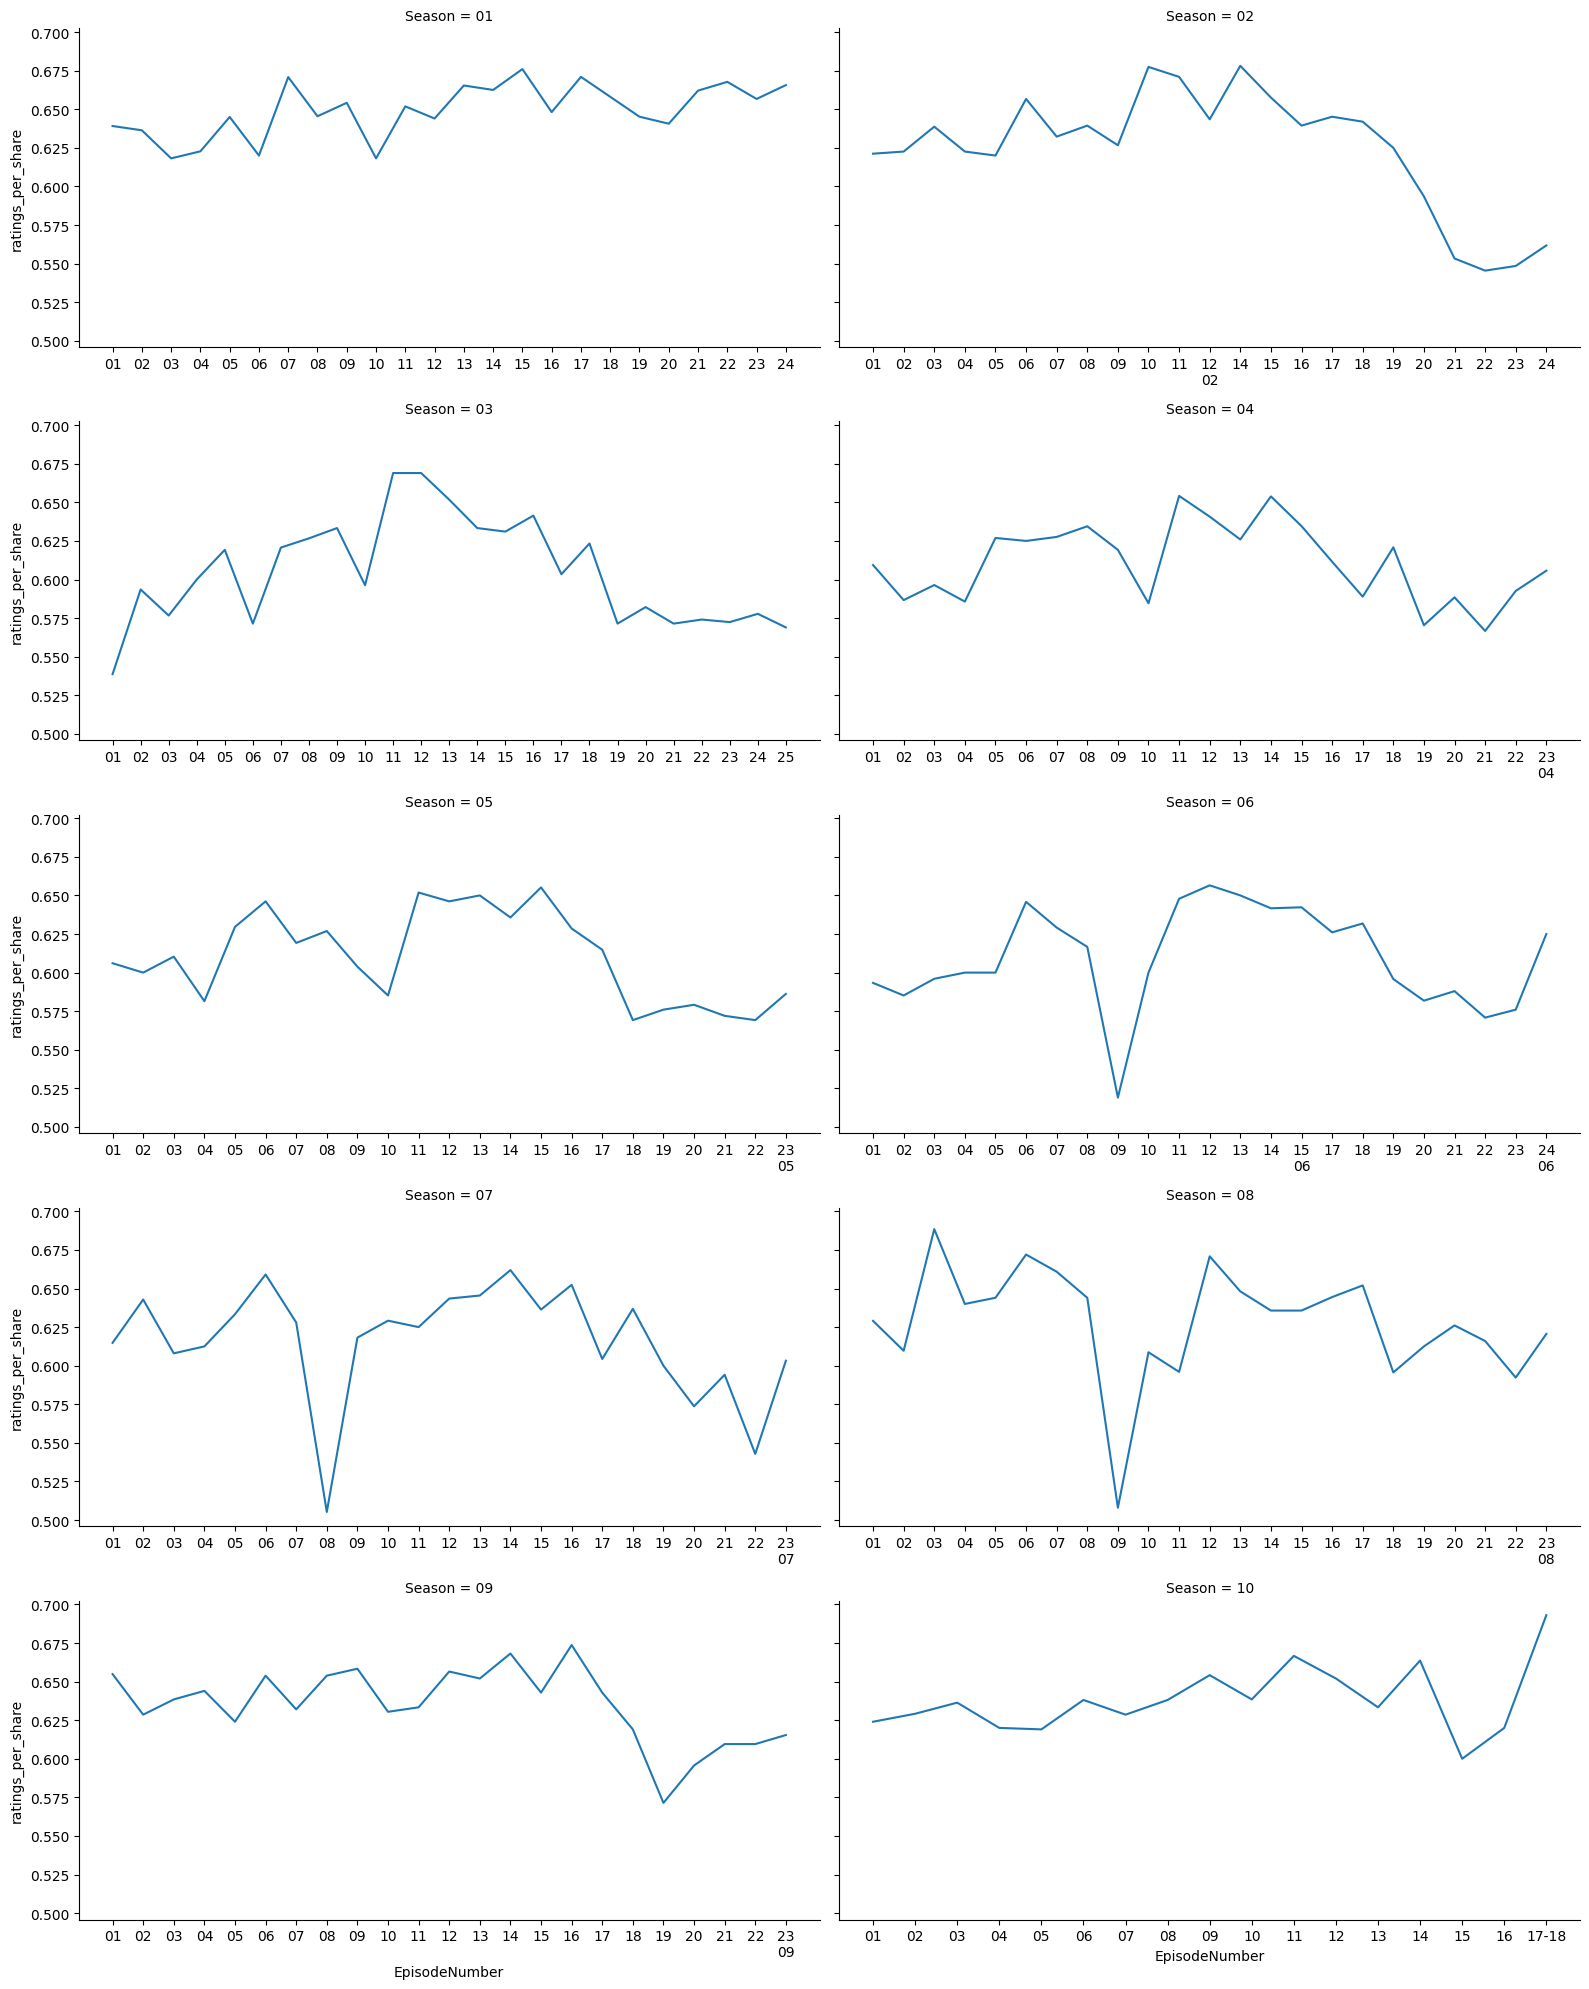

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

sea = sns.FacetGrid(
    df3.dropna(subset=["EpisodeNumber"]),
    col="Season",
    height=4,
    aspect=2,
    col_wrap=2,
    sharex=False,
    sharey=True,
)
sea.map(sns.lineplot, "EpisodeNumber", "ratings_per_share")

### Visualizing Highest-Rated Episodes Season by Season

To visualize the highest-rated episodes, we will employ a graphical representation that highlights the ratings' variations across seasons. This method will allow us to understand how the show's appeal evolved over time.
As we can see from the below pie chart that the ratings share for all the seasons are almost similar. 

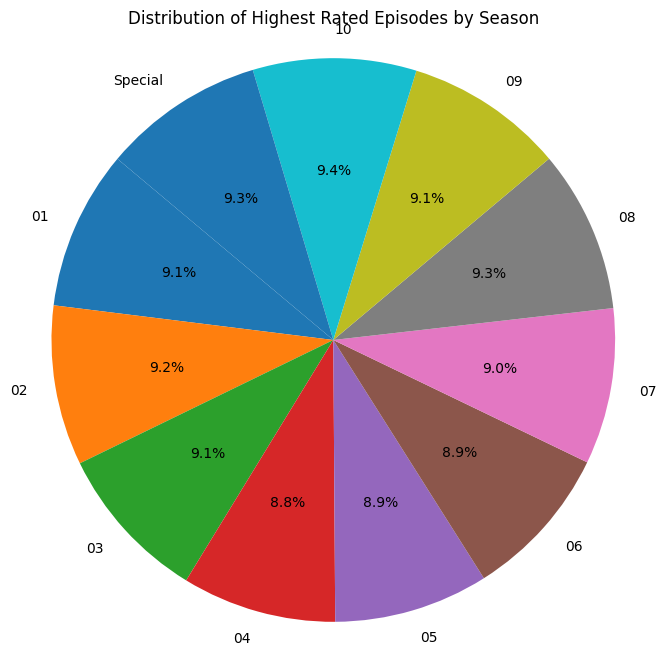

In [21]:
# Grouping data by season and finding the highest-rated episode in each season
highest_rated_per_season = df3.groupby("Season")["ratings_per_share"].max()

# Creating a pie chart to visualize the distribution of highest-rated episodes by season
plt.figure(figsize=(8, 8))
plt.pie(
    highest_rated_per_season,
    labels=highest_rated_per_season.index,
    autopct="%1.1f%%",
    startangle=140,
)
plt.title("Distribution of Highest Rated Episodes by Season")
plt.axis("equal")  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

### Visualizing Top 20 Writers by Number of Episodes Written

**Creating a Writers' Contribution Visualization**

To visualize the top 20 writers, we will use a bar chart that showcases the number of episodes written by each writer. By representing this data graphically, we can understand the significant role different writers played in the show's creation.


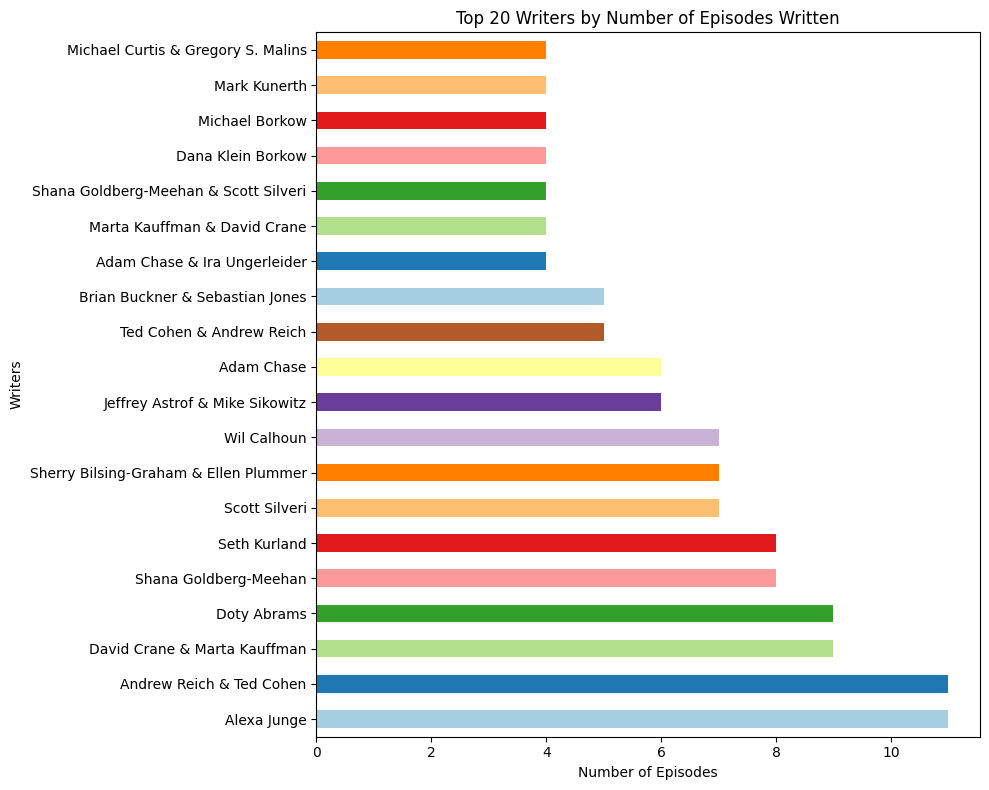

In [22]:
# Count the number of episodes written by each writer
writer_episode_counts = df3["Written by"].value_counts()

# Select the top 20 writers
top_20_writers = writer_episode_counts.head(20)

# Create a bar chart with different colors for each bar
plt.figure(figsize=(10, 8))
top_20_writers.plot(kind="barh", color=plt.cm.Paired.colors)
plt.title("Top 20 Writers by Number of Episodes Written")
plt.xlabel("Number of Episodes")
plt.ylabel("Writers")
plt.tight_layout()
plt.show()

### Visualizing Episode named after Main Characters

Let's explore the episodes where the main characters Ross, Rachel, Joey, Monica, Chandler, and Phoebe where the title is named after. This visualization will provide insights into the distribution of episodes centered around each character.

**Creating a Character Involvement Visualization**

To visualize the character involvement, we will use a bar chart that illustrates the frequency of episodes featuring each main character.


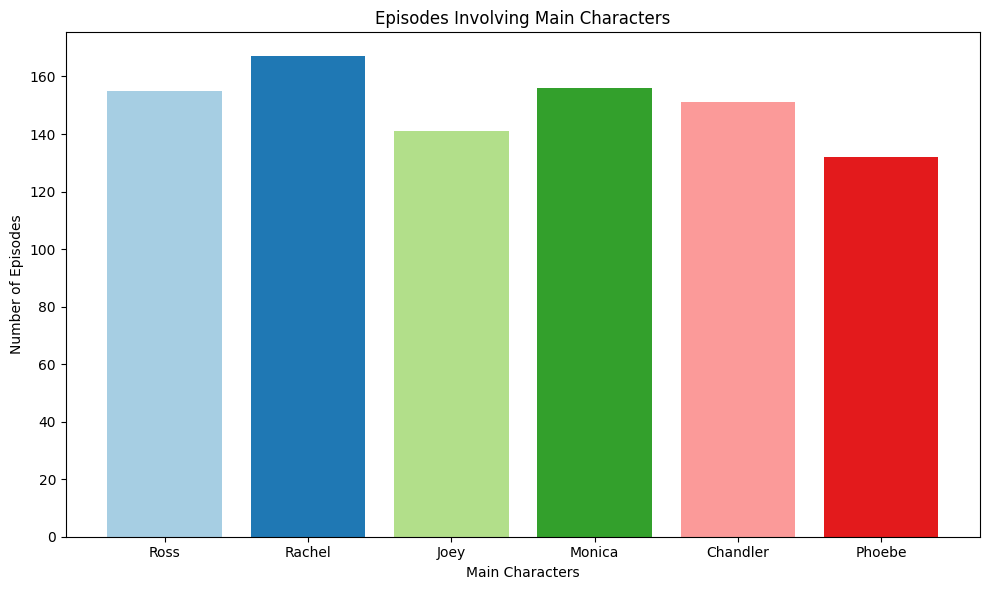

In [23]:
# List of main characters
main_characters = ["Ross", "Rachel", "Joey", "Monica", "Chandler", "Phoebe"]

# Count the number of episodes involving each main character
character_involvement = {}
for character in main_characters:
    character_involvement[character] = (
        df3["Summary"].str.contains(character, case=False).sum()
    )

# Create a bar chart to visualize character involvement
plt.figure(figsize=(10, 6))
plt.bar(
    character_involvement.keys(),
    character_involvement.values(),
    color=plt.cm.Paired.colors,
)
plt.title("Episodes Involving Main Characters")
plt.xlabel("Main Characters")
plt.ylabel("Number of Episodes")
plt.tight_layout()
plt.show()

## Exploring Director Contributions: Top 20 Directors

We tally the number of episodes directed by each individual, shedding light on the pivotal role they played in shaping the show's narrative.

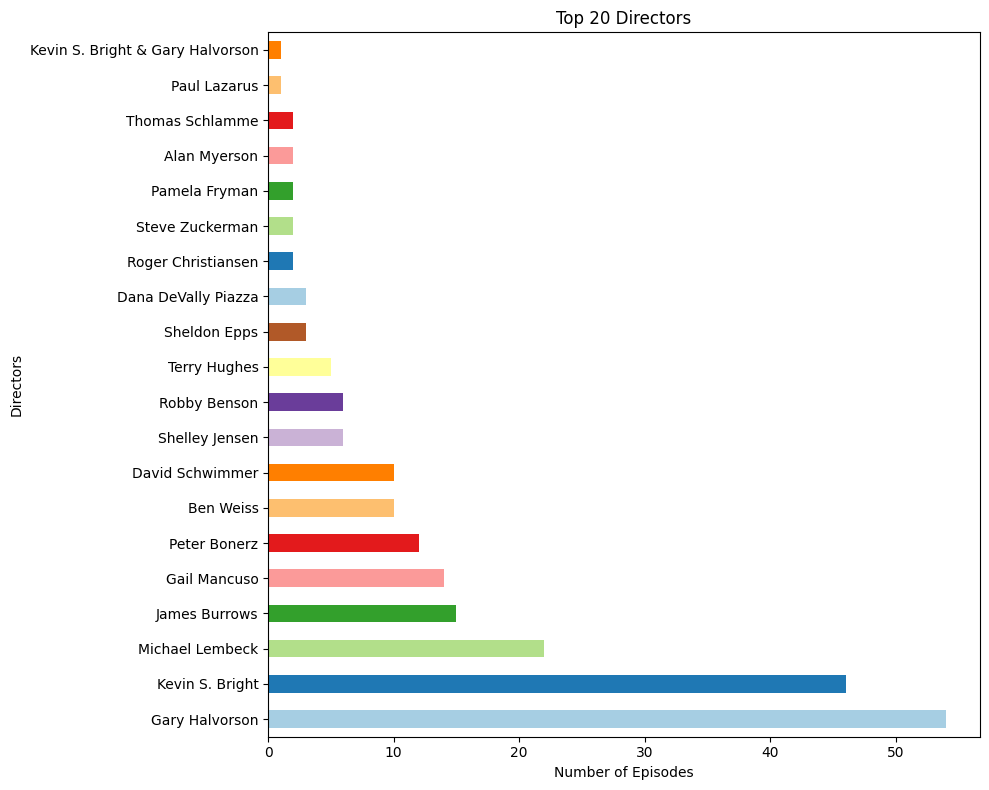

In [24]:
# Count the number of episodes written by each writer
director_episode_counts = df3["Directed by"].value_counts()

# Select the top 20 writers
top_20_directors = director_episode_counts.head(20)

# Create a bar chart with different colors for each bar
plt.figure(figsize=(10, 8))
top_20_directors.plot(kind="barh", color=plt.cm.Paired.colors)
plt.title("Top 20 Directors")
plt.xlabel("Number of Episodes")
plt.ylabel("Directors")
plt.tight_layout()
plt.show()

## Exploring Episode Duration: A Seasonal Analysis

### Decoding Duration Trends: A Visual Journey

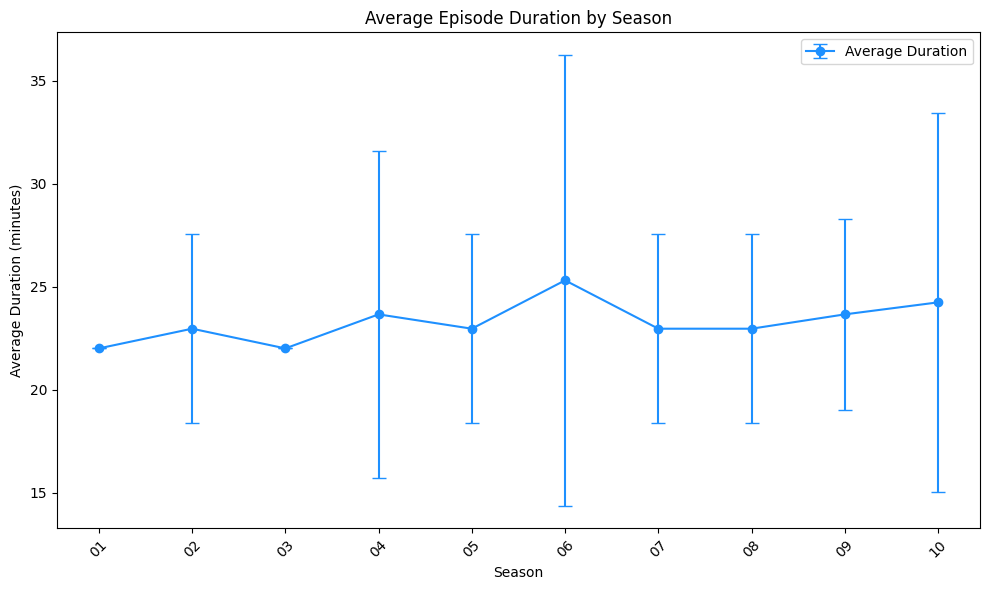

In [25]:
# Calculate the average episode duration and standard deviation by season
average_duration_by_season = df3.groupby("Season")["Duration"].mean()
std_deviation_by_season = df3.groupby("Season")["Duration"].std()

# Create an interval chart to visualize average episode duration by season
plt.figure(figsize=(10, 6))
plt.errorbar(
    average_duration_by_season.index,
    average_duration_by_season,
    yerr=std_deviation_by_season,
    marker="o",
    color="dodgerblue",
    capsize=5,
    label="Average Duration",
)
plt.title("Average Episode Duration by Season")
plt.xlabel("Season")
plt.ylabel("Average Duration (minutes)")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

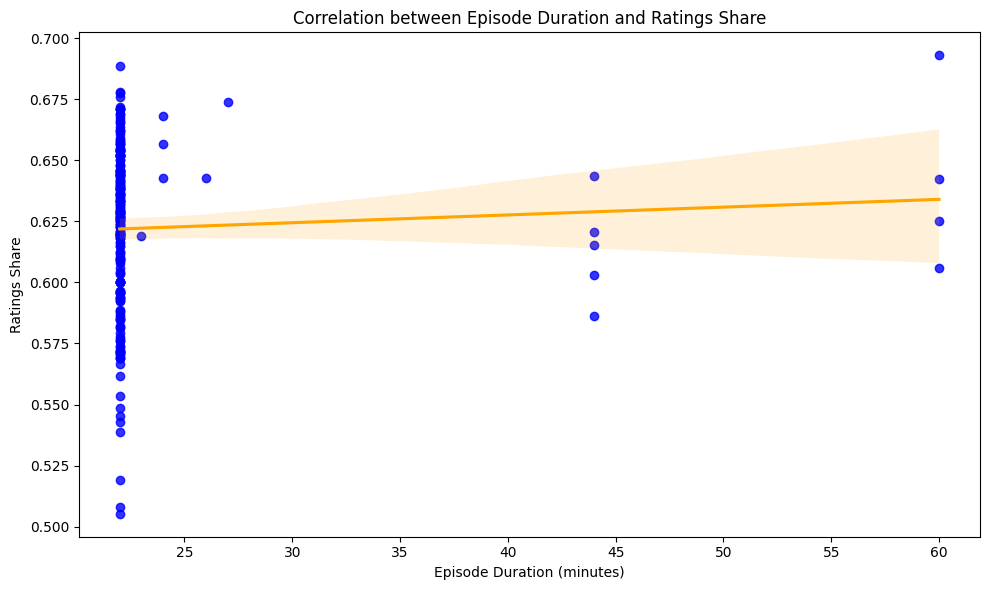

In [26]:
# Create a joint scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(
    data=df3,
    x="Duration",
    y="ratings_per_share",
    scatter_kws={"color": "blue"},
    line_kws={"color": "orange"},
)
plt.title("Correlation between Episode Duration and Ratings Share")
plt.xlabel("Episode Duration (minutes)")
plt.ylabel("Ratings Share")
plt.tight_layout()
plt.show()

In [27]:
def generate_wordcloud(df, name):
    series = df[name].dropna()
    text = " ".join(series)
    wordcloud = WordCloud(
        max_words=50,
        width=400,
        height=200,
        margin=4,
        background_color="white",
        max_font_size=50,
        min_word_length=4,
        prefer_horizontal=1.0,
    ).generate(text)
    # Display the generated image:
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

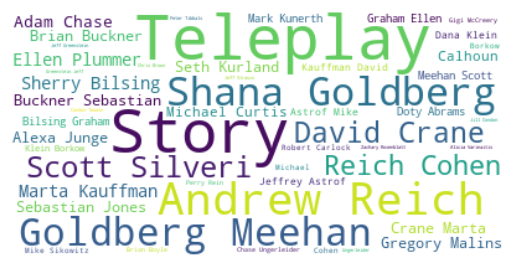

In [28]:
generate_wordcloud(df, "Written by")

## Conclusion: Exploratory Data Analysis of "Friends" TV Show Dataset

In this exploratory data analysis (EDA) of the "Friends" TV show dataset, we delved into the dataset to uncover insights and patterns related to the show's episodes, characters, directors, and ratings. Our analysis provided valuable information that sheds light on various aspects of the show's performance and audience reception.

### Key Findings

1. **Episode Distribution:** We examined the distribution of episodes across seasons and discovered the number of episodes in each season, highlighting any deviations or patterns in episode production over time.

2. **Directors and Episodes:** Analyzing directors' contributions, we showcased the top directors based on the number of episodes they directed, providing insights into the creators behind the show's visual direction.

3. **Ratings and Duration:** We investigated the correlation between episode duration and ratings share, revealing whether there is a relationship between the length of an episode and its audience ratings.

4. **Episode Types:** Splitting the "Episode" column into season, episode number, and special episode components allowed us to categorize episodes and understand the distribution of different types.


### Final Thoughts

Through this exploratory data analysis, we gained a deeper understanding of the "Friends" TV show dataset, revealing intriguing insights into its episodes, characters, and audience reception. These findings can guide further research and contribute to a more comprehensive understanding of the show's impact and cultural significance.
